In [1]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import seaborn as sns

In [2]:
checkpoints = r'C:\Users\Hp\Desktop\ml labs\check point\\E1-cp-{epoch:04d}-loss{val_loss:.2f}.h5'

In [3]:
train_dir = r'D:\eight semester\plant disease dataset\computer vision\train'
validation_dir = r'D:\eight semester\plant disease dataset\computer vision\validation'
test_dir = r'D:\eight semester\plant disease dataset\computer vision\test'

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='sigmoid'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [6]:
model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

D:\7th semester\anaconda\envs\jawadhadi\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [7]:
train_datagen = ImageDataGenerator(
                                    rescale=1./255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                                                    train_dir,
                                                    target_size=(256, 256),
                                                    batch_size=32,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
                                                        validation_dir,
                                                        target_size=(256, 256),
                                                        batch_size=32,
                                                        class_mode='categorical')

Found 1600 images belonging to 4 classes.
Found 252 images belonging to 4 classes.


In [8]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(256, 256), batch_size=32,class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(256, 256),batch_size=32,class_mode='categorical')

Found 1600 images belonging to 4 classes.
Found 252 images belonging to 4 classes.


In [9]:
EpochCheckpoint = ModelCheckpoint(checkpoints,
                             monitor="val_loss",
                             save_best_only=True, 
                             verbose=1)
callbacks = [EpochCheckpoint]

In [10]:
model_history = model.fit(train_generator,
                         validation_data =validation_generator,
                         steps_per_epoch=train_generator.n//train_generator.batch_size,
                         validation_steps = validation_generator.n//validation_generator.batch_size,
                         epochs = 8,
                         callbacks = callbacks)

Epoch 1/8
50/50 [==============================] - ETA: 0s - loss: 0.8476 - acc: 0.6150
Epoch 1: val_loss improved from inf to 0.55886, saving model to C:\Users\Hp\Desktop\ml labs\check point\E1-cp-0001-loss0.56.h5
50/50 [==============================] - 305s 6s/step - loss: 0.8476 - acc: 0.6150 - val_loss: 0.5589 - val_acc: 0.7366
Epoch 2/8
50/50 [==============================] - ETA: 0s - loss: 0.4835 - acc: 0.7769
Epoch 2: val_loss improved from 0.55886 to 0.45032, saving model to C:\Users\Hp\Desktop\ml labs\check point\E1-cp-0002-loss0.45.h5
50/50 [==============================] - 286s 6s/step - loss: 0.4835 - acc: 0.7769 - val_loss: 0.4503 - val_acc: 0.7411
Epoch 3/8
50/50 [==============================] - ETA: 0s - loss: 0.4167 - acc: 0.8037
Epoch 3: val_loss did not improve from 0.45032
50/50 [==============================] - 283s 6s/step - loss: 0.4167 - acc: 0.8037 - val_loss: 0.4702 - val_acc: 0.7857
Epoch 4/8
50/50 [==============================] - ETA: 0s - loss: 0.35

In [11]:
model_history.history

{'loss': [0.8753505945205688,
  0.4798744320869446,
  0.36466243863105774,
  0.301390141248703,
  0.27842977643013,
  0.24325057864189148,
  0.20581482350826263,
  0.1808222383260727,
  0.1814872771501541,
  0.164246067404747,
  0.16185344755649567,
  0.12393712997436523,
  0.13090483844280243,
  0.11855912953615189,
  0.11614817380905151,
  0.09477021545171738,
  0.08216279000043869,
  0.08734211325645447,
  0.07450011372566223,
  0.06624019891023636,
  0.05356349050998688,
  0.055808164179325104,
  0.04631183296442032,
  0.043280038982629776,
  0.04132638871669769,
  0.03553116321563721,
  0.03638863191008568,
  0.037737537175416946,
  0.033291060477495193,
  0.025195477530360222,
  0.045887261629104614,
  0.020918823778629303,
  0.020627062767744064,
  0.026452986523509026,
  0.02933582477271557,
  0.020180946215987206,
  0.014986587688326836,
  0.031100960448384285,
  0.03571275621652603,
  0.006369301117956638],
 'acc': [0.5950000286102295,
  0.7774999737739563,
  0.82562500238418

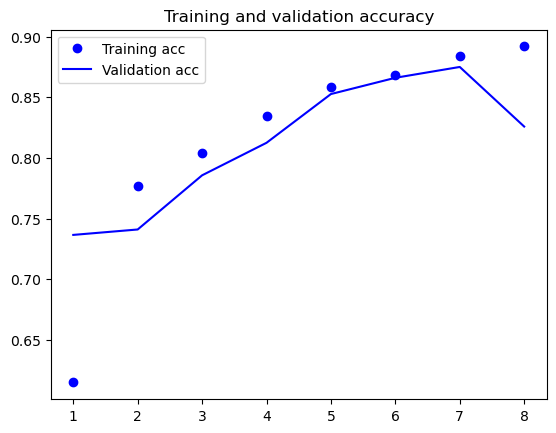

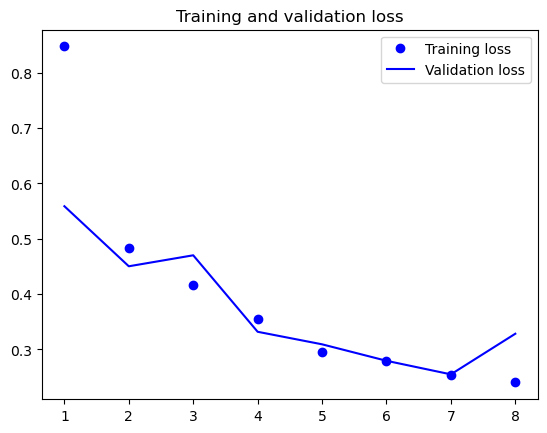

<Figure size 640x480 with 0 Axes>

In [27]:
acc = model_history.history['acc']
val_acc = model_history.history['val_acc']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
plt.savefig(r'D:\eight semester\plant disease dataset\computer vision\model_Accuracy\model_Accuracy.png')

Found 200 images belonging to 4 classes.
7/7 [==============================] - 9s 1s/step


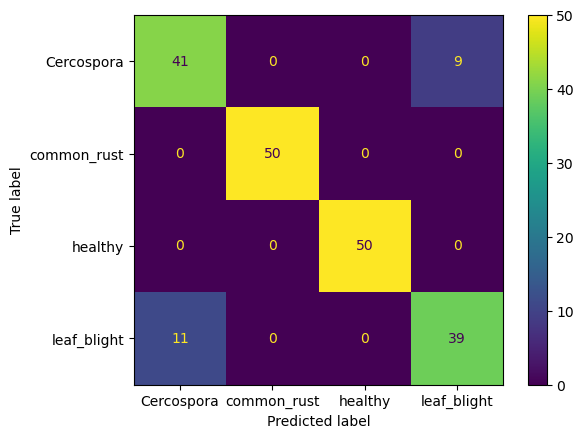

In [31]:
model = load_model(r'C:\Users\Hp\Desktop\ml labs\.ipynb_checkpoints\check point\E1-cp-0007-loss0.25.h5')
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(256, 256), batch_size=32, shuffle=False, class_mode='categorical')
label=test_generator.labels
preds=model.predict(test_generator)
pred = np.argmax(preds, axis = 1)
cm = confusion_matrix(label, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,  display_labels=['Cercospora', 'common_rust','healthy', 'leaf_blight'])
disp.plot()
plt.show()
#plt.savefig(r'C:\Users\Administrator\Downloads\ML Lab\Computer vision\lab11\confusion_matrics.jpg')

In [32]:
print(classification_report(label, pred, target_names=['Cercospora', 'common_rust','healthy', 'leaf_blight']))

              precision    recall  f1-score   support

  Cercospora       0.79      0.82      0.80        50
 common_rust       1.00      1.00      1.00        50
     healthy       1.00      1.00      1.00        50
 leaf_blight       0.81      0.78      0.80        50

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200

